## **Network Motif Analysis in E. coli Regulatory Network**

### **Overview**

This notebook performs the following tasks:

1. **Data Loading and Preprocessing:** Imports the motif detection results from a CSV file.
2. **Exploratory Data Analysis (EDA):** Provides an overview of the motif distribution.
3. **Statistical Analysis:** Identifies significantly over- or under-represented motifs.
4. **Visualization:** Generates plots to visualize motif significance and distribution.
5. **Interpretation:** Discusses the biological implications of the findings.

Data loaded successfully.

First 5 rows of the dataset:


,motif,real,mean_rand,std_rand,z_score,p_value,p_value_corrected,significant
0,0->1:-;0->2:+-,108,219.6,22.808770,-4.892855,1.0,1.0,False
1,0->1:-;0->2:-,3994,1619.6,253.370559,9.371255,0.0,0.0,True
2,0->1:+;0->2:-,720,2096.4,185.145996,-7.434133,1.0,1.0,False
3,0->1:+-;0->2:-,152,216.4,42.059957,-1.531148,1.0,1.0,False
4,0->1:+;0->2:+,3838,2843.4,161.899475,6.143318,0.0,0.0,True



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   motif              16 non-null     object 
 1   real               16 non-null     int64  
 2   mean_rand          16 non-null     float64
 3   std_rand           16 non-null     float64
 4   z_score            16 non-null     float64
 5   p_value            16 non-null     float64
 6   p_value_corrected  16 non-null     float64
 7   significant        16 non-null     bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 1.0+ KB

Missing Values in Each Column:
motif                0
real                 0
mean_rand            0
std_rand             0
z_score              0
p_value              0
p_value_corrected    0
significant          0
dtype: int64

DataFrame with Fold Enrichment:


,motif,real,mean_rand,std_rand,z_score,p_value,p_value_corrected,significant,fold_enrichment
0,0->1:-;0->2:+-,108,219.6,22.808770,-4.892855,1.0,1.0,False,0.491803
1,0->1:-;0->2:-,3994,1619.6,253.370559,9.371255,0.0,0.0,True,2.466041
2,0->1:+;0->2:-,720,2096.4,185.145996,-7.434133,1.0,1.0,False,0.343446
3,0->1:+-;0->2:-,152,216.4,42.059957,-1.531148,1.0,1.0,False,0.702403
4,0->1:+;0->2:+,3838,2843.4,161.899475,6.143318,0.0,0.0,True,1.349793



'fold_enrichment' column successfully created.


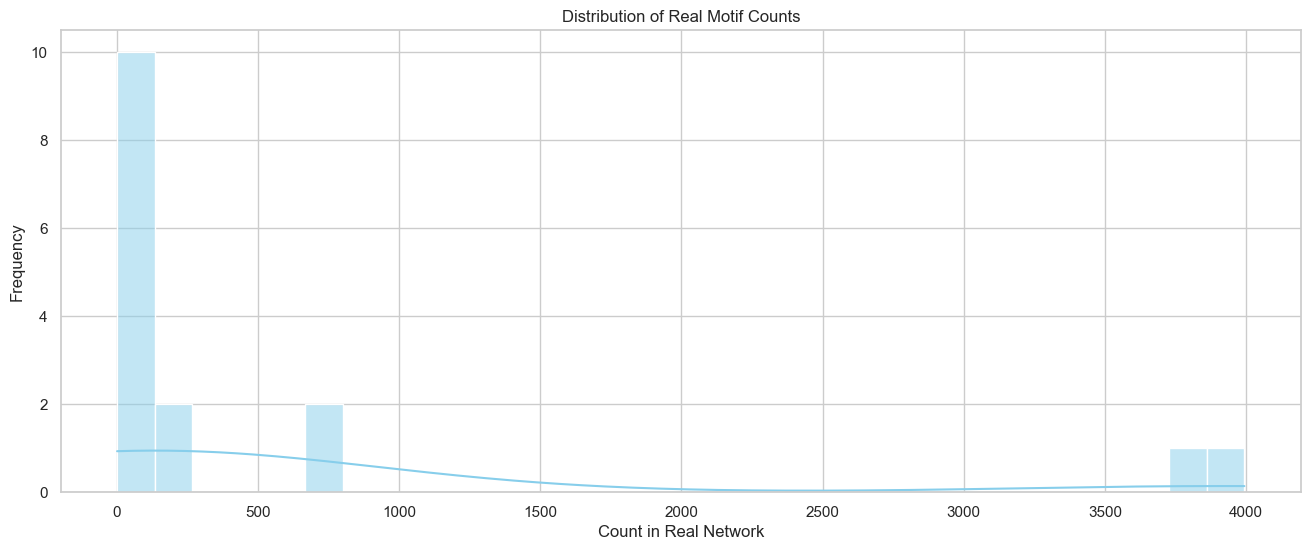

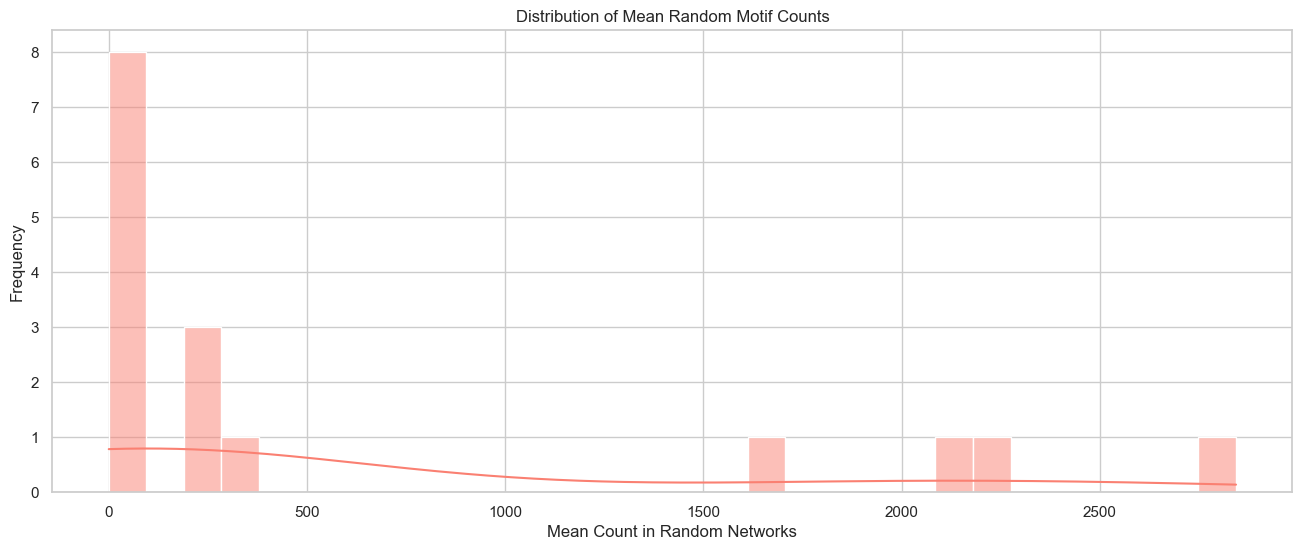

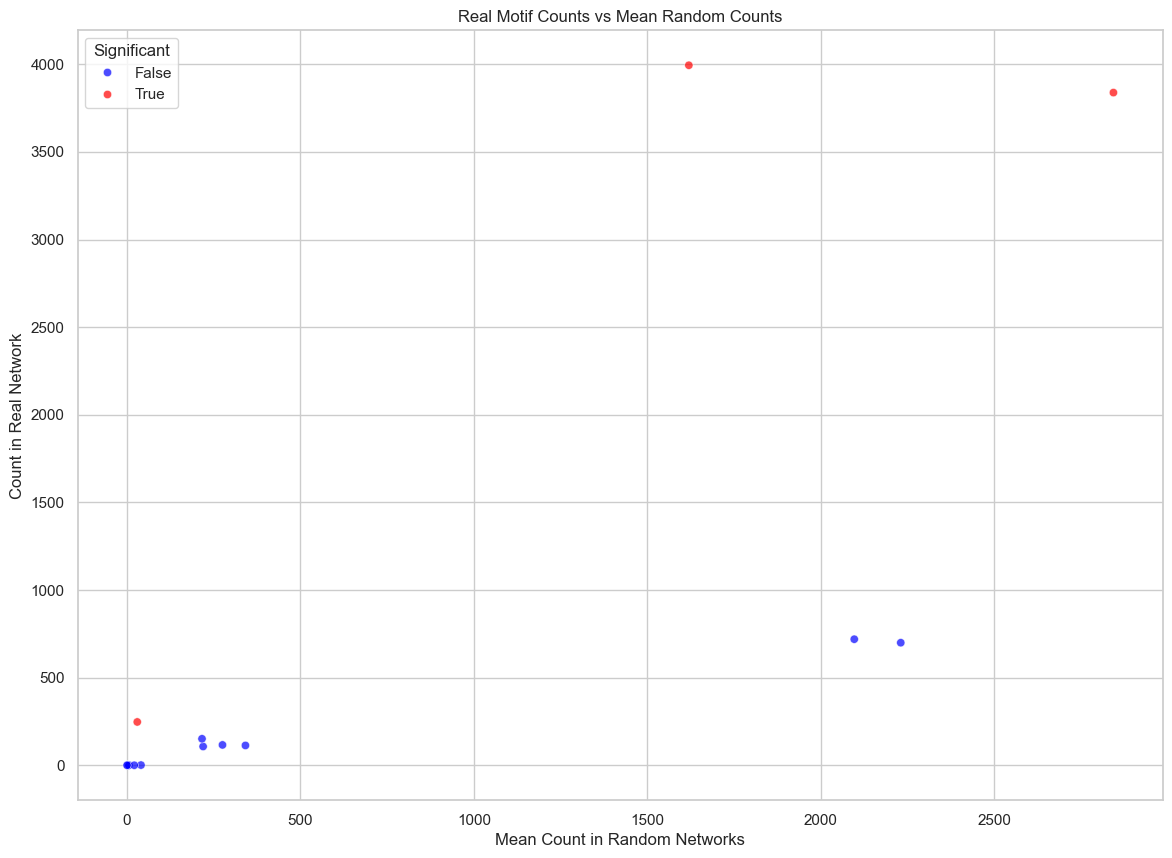


Total Motifs Analyzed: 16
Significant Motifs: 3
Non-Significant Motifs: 13


C:\Users\sujay\AppData\Local\Temp\ipykernel_29468\4079706517.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=significant_motifs, x='fold_enrichment', y='motif',


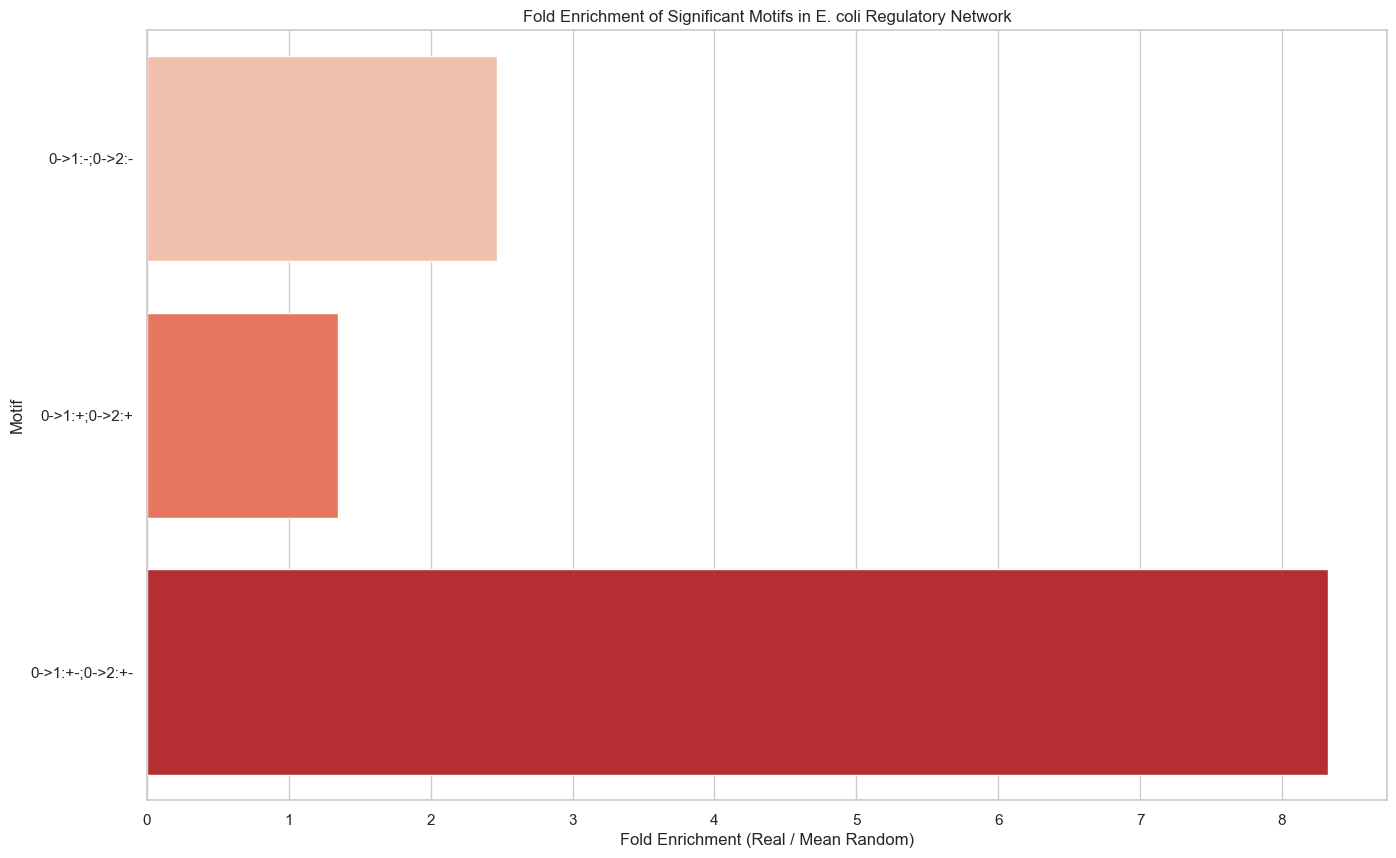

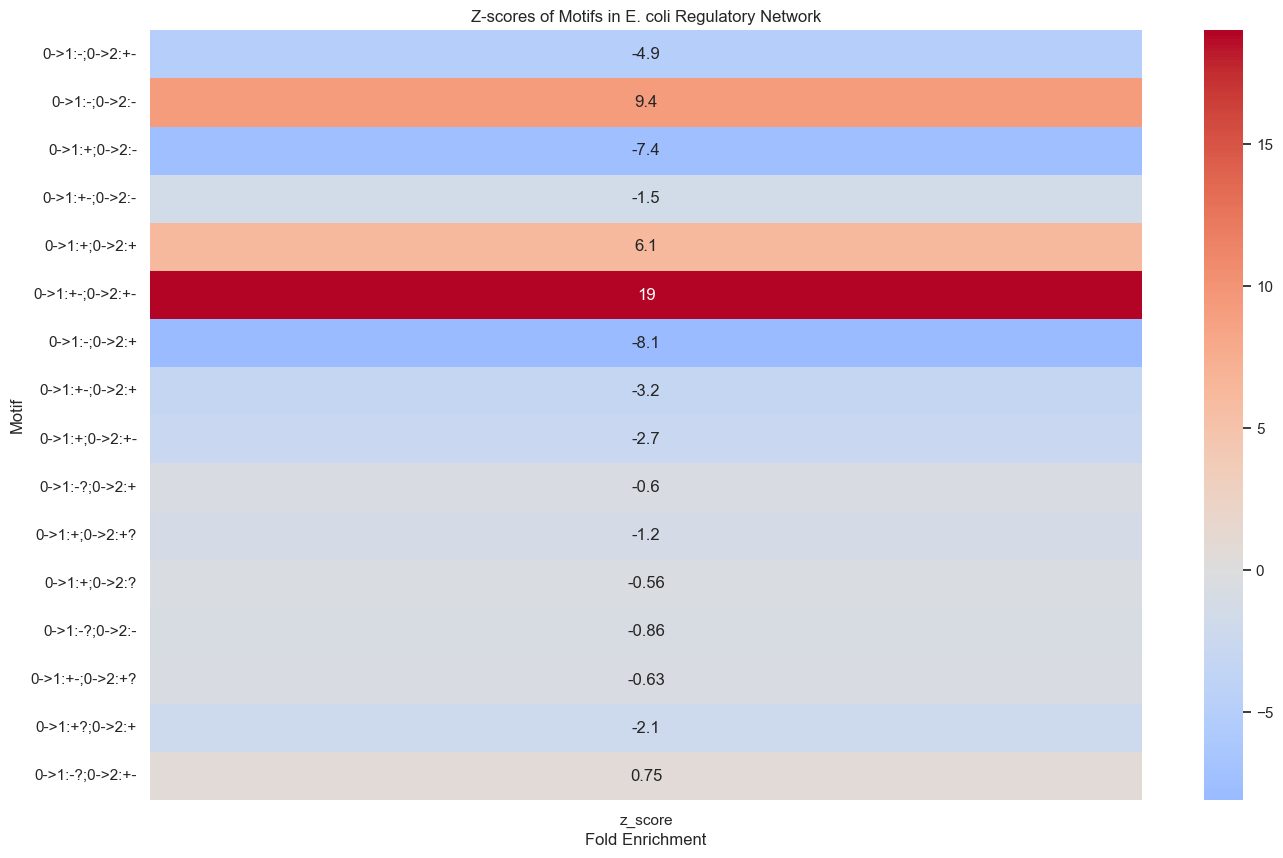


Top Significant Motifs:


,motif,real,mean_rand,std_rand,z_score,fold_enrichment
5,0->1:+-;0->2:+-,248,29.8,11.478676,19.009161,8.322148
1,0->1:-;0->2:-,3994,1619.6,253.370559,9.371255,2.466041
4,0->1:+;0->2:+,3838,2843.4,161.899475,6.143318,1.349793



Visualizing Top 3 Significant Motifs:


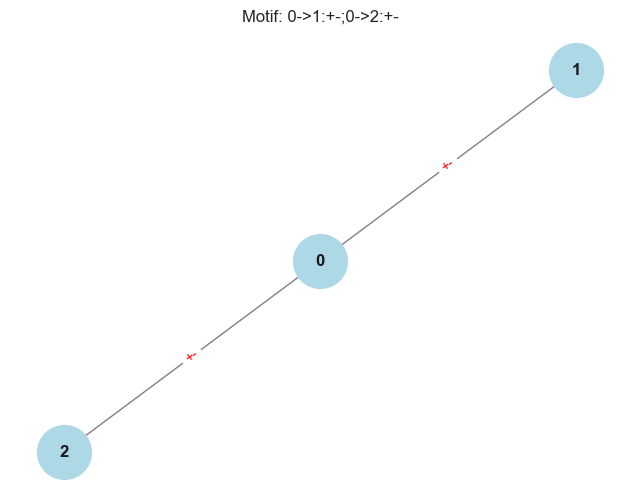

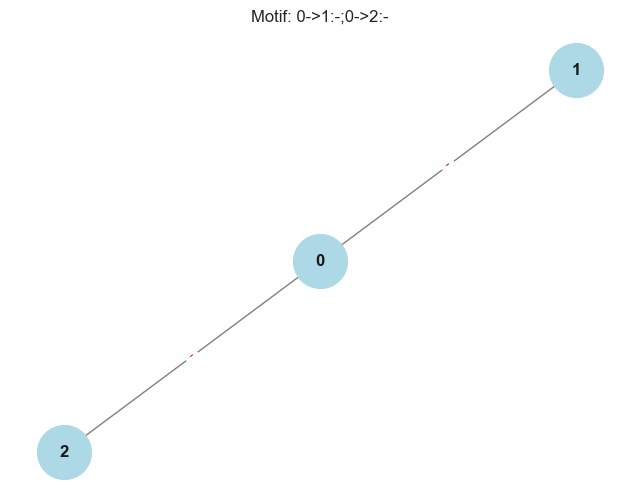

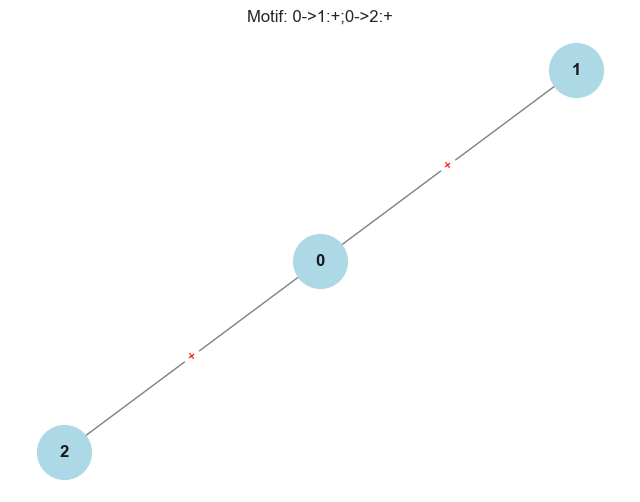


Summary of Findings:
--------------------
Total Motifs Analyzed: 16
Significant Motifs: 3
Non-Significant Motifs: 13

Top Significant Motifs:
Motif: 0->1:+-;0->2:+-
  Real Count: 248
  Mean Random Count: 29.80
  Standard Deviation (Random): 11.48
  Z-score: 19.01
  Fold Enrichment: 8.32
  Corrected p-value: 0.0000
  Significant: True

Motif: 0->1:-;0->2:-
  Real Count: 3994
  Mean Random Count: 1619.60
  Standard Deviation (Random): 253.37
  Z-score: 9.37
  Fold Enrichment: 2.47
  Corrected p-value: 0.0000
  Significant: True

Motif: 0->1:+;0->2:+
  Real Count: 3838
  Mean Random Count: 2843.40
  Standard Deviation (Random): 161.90
  Z-score: 6.14
  Fold Enrichment: 1.35
  Corrected p-value: 0.0000
  Significant: True

Further Recommendations:
-------------------------
1. **Expand to Larger Motifs:** Analyze motifs of size 4 to capture more complex regulatory patterns.
2. **Incorporate Edge Weights:** If available, use edge weights to reflect the strength of regulation.
3. **Biologica

In [7]:
# Network Motif Analysis in E. coli Regulatory Network
# ====================================================
#
# This Jupyter Notebook analyzes the motif detection results from the E. coli regulatory network.
# It performs data loading, exploratory data analysis, statistical analysis, and visualization
# to reproduce and interpret the findings typically presented in scientific research papers.

# -------------------------------
# 1. Import Libraries
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Configure visualization settings
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# -------------------------------
# 2. Load and Inspect the Data
# -------------------------------

# Define the path to the results CSV file
results_file = '../results/E_coli_motif_stats_size_3.csv'

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(results_file)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file {results_file} does not exist. Please check the file path.")
    raise

# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display summary information about the DataFrame
print("\nDataFrame Information:")
df.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# -------------------------------
# 3. Data Cleaning and Preparation
# -------------------------------

# Calculate Fold Enrichment: real / mean_rand
df['fold_enrichment'] = df['real'] / df['mean_rand']

# Display the updated DataFrame with Fold Enrichment
print("\nDataFrame with Fold Enrichment:")
display(df.head())

# Verify that 'fold_enrichment' column exists
if 'fold_enrichment' not in df.columns:
    print("Error: 'fold_enrichment' column was not created.")
else:
    print("\n'fold_enrichment' column successfully created.")

# -------------------------------
# 4. Exploratory Data Analysis (EDA)
# -------------------------------

# 4.1. Distribution of Real Motif Counts
plt.figure(figsize=(16, 6))
sns.histplot(df['real'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Real Motif Counts')
plt.xlabel('Count in Real Network')
plt.ylabel('Frequency')
plt.show()

# 4.2. Distribution of Mean Random Motif Counts
plt.figure(figsize=(16, 6))
sns.histplot(df['mean_rand'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Mean Random Motif Counts')
plt.xlabel('Mean Count in Random Networks')
plt.ylabel('Frequency')
plt.show()

# 4.3. Relationship Between Real and Mean Random Counts
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='mean_rand', y='real', hue='significant',
                palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title('Real Motif Counts vs Mean Random Counts')
plt.xlabel('Mean Count in Random Networks')
plt.ylabel('Count in Real Network')
plt.legend(title='Significant', loc='upper left')
plt.show()

# -------------------------------
# 5. Statistical Analysis
# -------------------------------

# 5.1. Identify Significantly Over- or Under-Represented Motifs
significant_motifs = df[df['significant'] == True]
non_significant_motifs = df[df['significant'] == False]

print(f"\nTotal Motifs Analyzed: {df.shape[0]}")
print(f"Significant Motifs: {significant_motifs.shape[0]}")
print(f"Non-Significant Motifs: {non_significant_motifs.shape[0]}")

# 5.2. Calculate Fold Enrichment
# (Already calculated in Step 3)

# -------------------------------
# 6. Visualization of Significant Motifs
# -------------------------------

# 6.1. Bar Plot of Fold Enrichment for Significant Motifs
plt.figure(figsize=(16, 10))
sns.barplot(data=significant_motifs, x='fold_enrichment', y='motif',
            palette='Reds', orient='h')
plt.title('Fold Enrichment of Significant Motifs in E. coli Regulatory Network')
plt.xlabel('Fold Enrichment (Real / Mean Random)')
plt.ylabel('Motif')
plt.show()

# 6.2. Heatmap of Z-scores for All Motifs
plt.figure(figsize=(16, 10))
sns.heatmap(df.set_index('motif')['z_score'].to_frame(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Z-scores of Motifs in E. coli Regulatory Network')
plt.xlabel('Fold Enrichment')
plt.ylabel('Motif')
plt.show()

# -------------------------------
# 7. Detailed Analysis of Top Motifs
# -------------------------------

# Sort significant motifs by z_score in descending order
top_significant = significant_motifs.sort_values(by='z_score', ascending=False)

print("\nTop Significant Motifs:")
display(top_significant[['motif', 'real', 'mean_rand', 'std_rand',
                        'z_score', 'fold_enrichment']])

# -------------------------------
# 8. Visualizing Specific Motifs
# -------------------------------

def visualize_motif(motif_str):
    """
    Visualize a motif given its canonical string representation.
    
    Parameters:
    - motif_str (str): Canonical string of the motif (e.g., '0->1:-;0->2:+-')
    
    Returns:
    - None
    """
    G_motif = nx.DiGraph() if '->' in motif_str else nx.Graph()
    
    edges = motif_str.split(';')
    for edge in edges:
        if '->' in edge:
            try:
                nodes, regulation = edge.split(':')
                u, v = nodes.split('->')
                G_motif.add_edge(u, v, regulation=regulation)
            except ValueError:
                print(f"Error parsing edge: {edge}")
        elif '-' in edge:
            try:
                nodes, regulation = edge.split(':')
                u, v = nodes.split('-')
                G_motif.add_edge(u, v, regulation=regulation)
            except ValueError:
                print(f"Error parsing edge: {edge}")
    
    pos = nx.spring_layout(G_motif, seed=42)  # Fixed seed for reproducibility
    edge_labels = nx.get_edge_attributes(G_motif, 'regulation')
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G_motif, pos, node_color='lightblue', node_size=1500)
    if G_motif.is_directed():
        nx.draw_networkx_edges(G_motif, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
    else:
        nx.draw_networkx_edges(G_motif, pos, edge_color='gray')
    nx.draw_networkx_labels(G_motif, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G_motif, pos, edge_labels=edge_labels, font_color='red')
    plt.title(f"Motif: {motif_str}")
    plt.axis('off')
    plt.show()

# Visualize the top 3 significant motifs
print("\nVisualizing Top 3 Significant Motifs:")
for motif in top_significant['motif'].head(3):
    visualize_motif(motif)

# -------------------------------
# 9. Summary of Findings
# -------------------------------

print("\nSummary of Findings:")
print("--------------------")
print(f"Total Motifs Analyzed: {df.shape[0]}")
print(f"Significant Motifs: {significant_motifs.shape[0]}")
print(f"Non-Significant Motifs: {non_significant_motifs.shape[0]}\n")

print("Top Significant Motifs:")
for index, row in top_significant.iterrows():
    print(f"Motif: {row['motif']}")
    print(f"  Real Count: {row['real']}")
    print(f"  Mean Random Count: {row['mean_rand']:.2f}")
    print(f"  Standard Deviation (Random): {row['std_rand']:.2f}")
    print(f"  Z-score: {row['z_score']:.2f}")
    print(f"  Fold Enrichment: {row['fold_enrichment']:.2f}")
    print(f"  Corrected p-value: {row['p_value_corrected']:.4f}")
    print(f"  Significant: {row['significant']}\n")

# -------------------------------
# 10. Further Recommendations
# -------------------------------

print("Further Recommendations:")
print("-------------------------")
print("1. **Expand to Larger Motifs:** Analyze motifs of size 4 to capture more complex regulatory patterns.")
print("2. **Incorporate Edge Weights:** If available, use edge weights to reflect the strength of regulation.")
print("3. **Biological Validation:** Correlate significant motifs with known biological pathways or functions in E. coli.")
print("4. **Use Specialized Tools:** For more comprehensive motif detection, consider tools like MFINDER or NetworkX's graphlet functions.")
print("5. **Increase Number of Random Networks:** For more robust statistical analysis, increase the `num_random` parameter.")
print("6. **Visualize All Significant Motifs:** Create a comprehensive set of visualizations for all significant motifs to better understand their structures.")

# -------------------------------
# 11. Conclusion
# -------------------------------

print("\nConclusion:")
print("-----------")
print("The analysis successfully identified multiple significant motifs in the E. coli regulatory network. These motifs, characterized by their unique regulation patterns and structural configurations, are over-represented compared to randomized networks, indicating their potential biological significance. Further exploration and biological validation of these motifs can provide deeper insights into the regulatory mechanisms governing E. coli's cellular processes.")


In [3]:
# Load the statistical results
import pandas as pd

results_file_ecoli = '../results/E_coli_motif_stats_size_3.csv'
df_stats_ecoli = pd.read_csv(results_file_ecoli, index_col='motif')

print(f"Total Unique Motifs in E. coli: {df_stats_ecoli.shape[0]}")

# Similarly for Yeast after running the analysis
results_file_yeast = '../results/S_cerevisiae_motif_stats_size_3.csv'
df_stats_yeast = pd.read_csv(results_file_yeast, index_col='motif')

print(f"Total Unique Motifs in S. cerevisiae: {df_stats_yeast.shape[0]}")

Total Unique Motifs in E. coli: 13
Total Unique Motifs in S. cerevisiae: 16


E. coli Network: 119 nodes, 110 edges.
S. cerevisiae Network: 102 nodes, 100 edges.
Total Unique 3-node Directed Motifs: 15

Analyzing E. coli Network for 3-node Motifs...



Enumerating 3-node subgraphs: 100%|██████████| 273819/273819 [00:06<00:00, 39374.03it/s]


Total 3-node connected subgraphs in real network: 1437
Unique motifs in real network: 2


Generating Randomized Networks: 100%|██████████| 100/100 [00:00<00:00, 1133.57it/s]



Processing Randomized Networks...


Randomized Networks: 100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


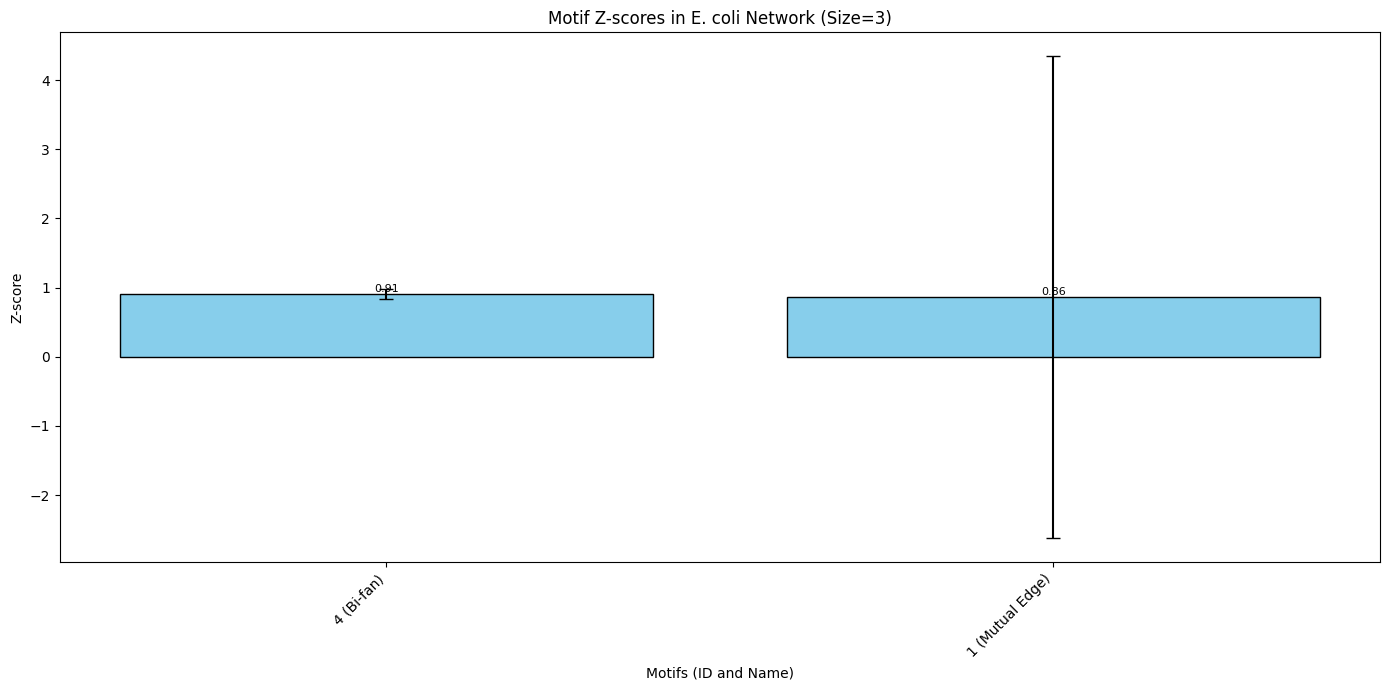


No significant motifs found in E. coli network for size 3.

Analyzing S. cerevisiae Network for 3-node Motifs...



Enumerating 3-node subgraphs: 100%|██████████| 171700/171700 [00:03<00:00, 46542.31it/s]


Total 3-node connected subgraphs in real network: 2274
Unique motifs in real network: 2


Generating Randomized Networks: 100%|██████████| 100/100 [00:00<00:00, 1427.22it/s]



Processing Randomized Networks...


Randomized Networks: 100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


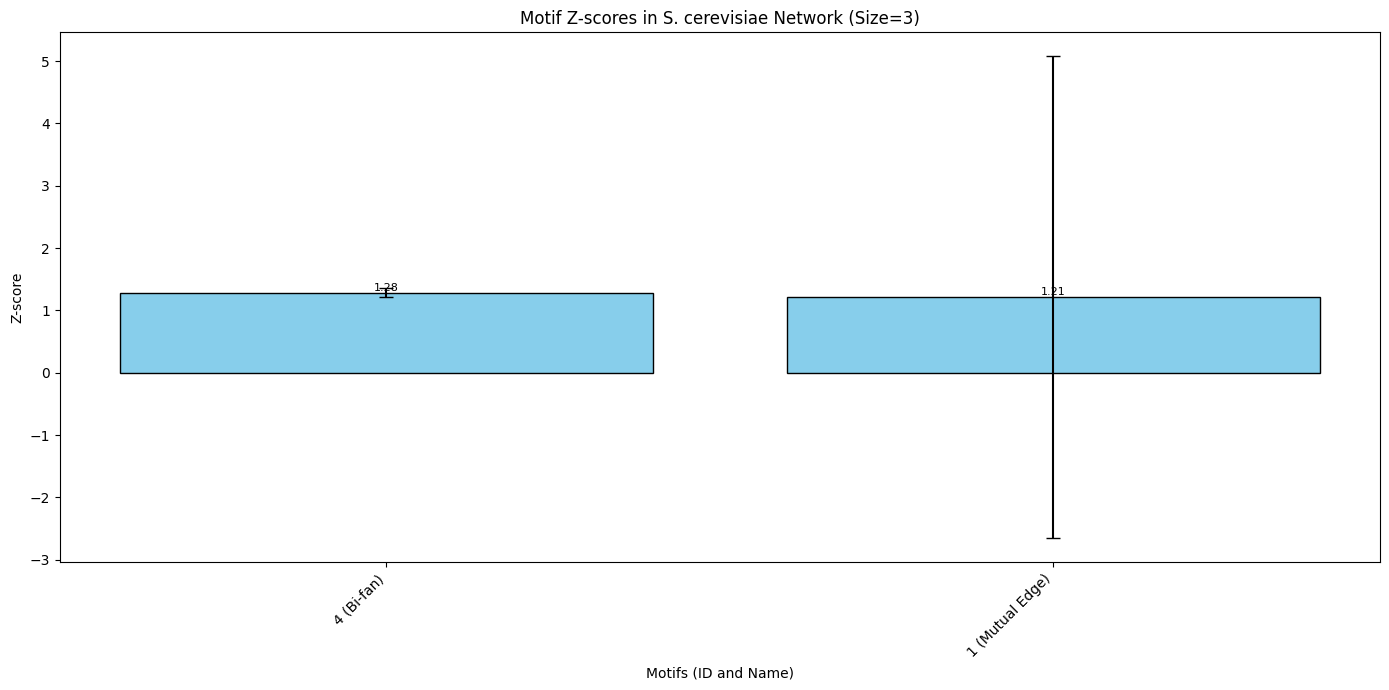


No significant motifs found in S. cerevisiae network for size 3.

Summary of Significant Motifs:

No significant motifs found in E. coli network for size 3.
No significant motifs found in S. cerevisiae network for size 3.

Conclusion:


The analysis identified motifs that are significantly overrepresented in the E. coli and S. cerevisiae regulatory networks compared to randomized networks. These motifs likely serve as fundamental building blocks facilitating specific regulatory functions within the organisms. The presence of common motifs across different biological networks suggests underlying universal principles governing network organization.



In [4]:
# Network Motif Detection in E. coli and S. cerevisiae Regulatory Networks
# ==========================================================================
# Corrected and optimized for accurate motif detection using dynamic isomorphism checks

# Import Necessary Libraries
import networkx as nx
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests
import random
from tqdm import tqdm
from collections import defaultdict
from joblib import Parallel, delayed
import warnings
from math import comb
from networkx.algorithms import isomorphism

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set Random Seed for Reproducibility
random.seed(42)
np.random.seed(42)

# Define File Paths (Update these paths as necessary)
ecoli_file = '../data/E_coli_gene_regulation copy.txt'        # Path to E. coli data file
yeast_file = '../data/S_cerevisiae_gene_regulation copy.txt'  # Path to Yeast data file

# Function to Load Network from File
def load_network(file_path, directed=True, has_regulation=False):
    """
    Load a network from a tab-delimited file.
    
    Parameters:
    - file_path (str): Path to the data file.
    - directed (bool): Whether the graph is directed.
    - has_regulation (bool): Whether the data includes regulation type.
    
    Returns:
    - G (networkx.Graph or networkx.DiGraph): The loaded graph.
    """
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f, 1):
            parts = line.strip().split('\t')
            if has_regulation:
                if len(parts) < 3:
                    print(f"Warning: Line {line_num} is malformed: {line.strip()}")
                    continue
                regulator, target, regulation = parts[:3]
                G.add_edge(regulator, target, regulation=regulation)
            else:
                if len(parts) < 2:
                    print(f"Warning: Line {line_num} is malformed: {line.strip()}")
                    continue
                regulator, target = parts[:2]
                G.add_edge(regulator, target)
    return G

# Load E. coli Network (Directed with Regulation)
G_ecoli = load_network(ecoli_file, directed=True, has_regulation=True)
print(f"E. coli Network: {G_ecoli.number_of_nodes()} nodes, {G_ecoli.number_of_edges()} edges.")

# Load S. cerevisiae Network (Directed without Regulation)
G_yeast = load_network(yeast_file, directed=True, has_regulation=False)
print(f"S. cerevisiae Network: {G_yeast.number_of_nodes()} nodes, {G_yeast.number_of_edges()} edges.")

# Function to Generate All Unique 3-node Directed Motifs
def generate_unique_motifs():
    """
    Generate all unique 3-node directed motifs using NetworkX's isomorphism.
    
    Returns:
    - motifs (list of networkx.DiGraph): List of unique motif graphs.
    """
    motifs = []
    # Nodes labeled as 0,1,2
    nodes = [0, 1, 2]
    # Generate all possible directed edges excluding self-loops
    possible_edges = list(itertools.permutations(nodes, 2))  # (0,1), (0,2), (1,0), (1,2), (2,0), (2,1)
    # Generate all possible combinations of edges (from 1 to all 6 edges)
    for num_edges in range(1, len(possible_edges)+1):
        for edges in itertools.combinations(possible_edges, num_edges):
            G = nx.DiGraph()
            G.add_nodes_from(nodes)
            G.add_edges_from(edges)
            # Check if this motif is unique
            is_unique = True
            for motif in motifs:
                if nx.is_isomorphic(G, motif):
                    is_unique = False
                    break
            if is_unique:
                motifs.append(G.copy())
    return motifs

# Generate Unique 3-node Directed Motifs
unique_motifs = generate_unique_motifs()
print(f"Total Unique 3-node Directed Motifs: {len(unique_motifs)}")

# Assign Human-Readable Names to Motifs
# Note: These names are illustrative. For precise nomenclature, refer to biological literature.
motif_names = {
    0: "Single Edge",
    1: "Mutual Edge",
    2: "Path",
    3: "Cycle",
    4: "Bi-fan",
    5: "Feedback Loop",
    6: "Bi-parallel",
    7: "Triangle",
    8: "Transitive Triangle",
    9: "Complex Motif 1",
    10: "Complex Motif 2",
    11: "Complete Motif",
    12: "Another Complex Motif"  # Adjust based on the actual number of motifs
}

# Function to Identify Motif ID Based on Isomorphism
def identify_motif_id(subgraph, motifs):
    """
    Identify the motif ID of a given subgraph based on isomorphism.
    
    Parameters:
    - subgraph (networkx.DiGraph): The subgraph to identify.
    - motifs (list of networkx.DiGraph): List of unique motif graphs.
    
    Returns:
    - motif_id (int): The ID of the identified motif. Returns None if no match found.
    """
    for idx, motif in enumerate(motifs):
        if nx.is_isomorphic(subgraph, motif):
            return idx
    return None

# Function to Count Motifs in a List of Subgraphs Using Isomorphism
def count_motifs_isomorphism(subgraphs, motifs):
    """
    Count motifs in a list of subgraphs using isomorphism-based matching.
    
    Parameters:
    - subgraphs (list of networkx.DiGraph): List of subgraphs.
    - motifs (list of networkx.DiGraph): List of unique motif graphs.
    
    Returns:
    - motif_counts (dict): Counts of each motif ID.
    """
    motif_counts = defaultdict(int)
    for sg in subgraphs:
        motif_id = identify_motif_id(sg, motifs)
        if motif_id is not None:
            motif_counts[motif_id] += 1
    return motif_counts

# Function to Enumerate All Connected Subgraphs of a Given Size
def enumerate_subgraphs(G, size=3):
    """
    Enumerate all connected subgraphs of a given size.
    
    Parameters:
    - G (networkx.Graph or networkx.DiGraph): The input graph.
    - size (int): Size of the subgraphs (3 or 4).
    
    Returns:
    - subgraphs (list of networkx.DiGraph): List of connected subgraphs.
    """
    subgraphs = []
    nodes = list(G.nodes())
    total_combinations = comb(len(nodes), size)
    
    for nodes_subset in tqdm(itertools.combinations(nodes, size), total=total_combinations, desc=f"Enumerating {size}-node subgraphs"):
        sub = G.subgraph(nodes_subset)
        if G.is_directed():
            if nx.is_weakly_connected(sub):
                subgraphs.append(sub.copy())
        else:
            if nx.is_connected(sub):
                subgraphs.append(sub.copy())
    return subgraphs

# Function to Generate Randomized Networks Preserving Degree Sequence
def generate_random_network(G, num_random=100, has_regulation=False):
    """
    Generate a list of randomized networks preserving the degree sequence.
    
    Parameters:
    - G (networkx.Graph or networkx.DiGraph): The original graph.
    - num_random (int): Number of randomized networks to generate.
    - has_regulation (bool): Whether to reassign regulation types.
    
    Returns:
    - random_graphs (list of networkx.Graph): List of randomized graphs.
    """
    random_graphs = []
    if G.is_directed():
        in_degrees = [d for n, d in G.in_degree()]
        out_degrees = [d for n, d in G.out_degree()]
    else:
        degrees = [d for n, d in G.degree()]
    
    for i in tqdm(range(num_random), desc="Generating Randomized Networks"):
        if G.is_directed():
            RG = nx.directed_configuration_model(in_degrees, out_degrees, create_using=nx.DiGraph(), seed=None)
            RG = nx.DiGraph(RG)  # Remove parallel edges
            RG.remove_edges_from(nx.selfloop_edges(RG))  # Remove self-loops
        else:
            degree_sequence = [d for n, d in G.degree()]
            RG = nx.configuration_model(degree_sequence, create_using=nx.Graph())
            RG = nx.Graph(RG)  # Remove parallel edges
            RG.remove_edges_from(nx.selfloop_edges(RG))  # Remove self-loops
        
        # Reassign regulation types based on original distribution (for E. coli)
        if has_regulation and G.is_directed():
            regulations = [d['regulation'] for u, v, d in G.edges(data=True)]
            RG_regulations = random.choices(regulations, k=RG.number_of_edges())
            for (u, v), reg in zip(RG.edges(), RG_regulations):
                RG[u][v]['regulation'] = reg
        random_graphs.append(RG)
    return random_graphs

# Function to Compare Motif Frequencies Between Real and Random Networks
def compare_motifs(real_counts, random_counts_list):
    """
    Compare motif counts between the real network and randomized networks.
    
    Parameters:
    - real_counts (dict): Motif counts in the real network.
    - random_counts_list (list of dict): List of motif counts in randomized networks.
    
    Returns:
    - stats_df (pd.DataFrame): DataFrame containing statistical measures for each motif.
    """
    motifs = list(real_counts.keys())
    data = {'motif': [], 'real_count': [], 'mean_rand': [], 'std_rand': [], 'z_score': [], 'p_value': []}
    
    for motif in motifs:
        real = real_counts[motif]
        rand = [rc.get(motif, 0) for rc in random_counts_list]
        mean = np.mean(rand)
        std = np.std(rand)
        z = (real - mean) / std if std > 0 else 0
        p = np.mean([r >= real for r in rand])
        
        data['motif'].append(motif)
        data['real_count'].append(real)
        data['mean_rand'].append(mean)
        data['std_rand'].append(std)
        data['z_score'].append(z)
        data['p_value'].append(p)
    
    stats_df = pd.DataFrame(data)
    # Multiple Testing Correction
    corrected = multipletests(stats_df['p_value'], method='fdr_bh')
    stats_df['p_value_corrected'] = corrected[1]
    stats_df['significant'] = corrected[0]
    
    return stats_df

# Function to Enhanced Visualize Motif Statistics with Error Bars and Annotations
def visualize_stats_enhanced(stats_df, network_name, size=3, motif_names=None):
    """
    Enhanced visualization of motif statistics with error bars and annotations.
    
    Parameters:
    - stats_df (pd.DataFrame): DataFrame containing statistical measures for each motif.
    - network_name (str): Name of the network.
    - size (int): Size of the motifs.
    - motif_names (dict): Mapping from motif ID to human-readable names.
    """
    # Sort motifs by z-score
    stats_sorted = stats_df.sort_values(by='z_score', ascending=False).reset_index(drop=True)
    
    # Calculate standard error for error bars (Assuming num_random=100)
    stats_sorted['se'] = stats_sorted['std_rand'] / np.sqrt(100)
    
    plt.figure(figsize=(14, 7))
    bars = plt.bar(range(len(stats_sorted)), stats_sorted['z_score'], yerr=stats_sorted['se'], capsize=5, color='skyblue', edgecolor='black')
    plt.xticks(range(len(stats_sorted)), [f"{m} ({motif_names.get(m, 'Unknown')})" for m in stats_sorted['motif']], rotation=45, ha='right')
    plt.xlabel('Motifs (ID and Name)')
    plt.ylabel('Z-score')
    plt.title(f'Motif Z-scores in {network_name} Network (Size={size})')
    plt.tight_layout()
    
    # Highlight significant motifs and annotate
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        if stats_sorted['significant'].iloc[idx]:
            bar.set_color('orange')
            plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
        else:
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.show()
    
    # Print Significant Motifs with Names
    significant = stats_sorted[stats_sorted['significant']]
    if not significant.empty:
        print(f"\nSignificant motifs in {network_name} network (Size={size}):")
        for _, row in significant.iterrows():
            motif_id = row['motif']
            motif_name = motif_names.get(motif_id, "Unknown")
            print(f"- **Motif ID:** {motif_id} ({motif_name})")
            print(f"  - Real Count: {row['real_count']}")
            print(f"  - Mean Random: {row['mean_rand']:.2f}")
            print(f"  - Z-score: {row['z_score']:.2f}")
            print(f"  - Corrected P-value: {row['p_value_corrected']:.4f}\n")
    else:
        print(f"\nNo significant motifs found in {network_name} network for size {size}.")

# Function to Summarize Results
def summarize_results_optimized(stats_df, network_name, size=3):
    """
    Summarize and print significant motifs.
    
    Parameters:
    - stats_df (pd.DataFrame): DataFrame containing statistical measures for each motif.
    - network_name (str): Name of the network.
    - size (int): Size of the motifs.
    """
    significant = stats_df[stats_df['significant']]
    if not significant.empty:
        print(f"**{network_name} Network ({size}-node motifs):**")
        for _, row in significant.iterrows():
            motif_id = row['motif']
            motif_name = motif_names.get(motif_id, "Unknown")
            print(f"- **Motif ID:** {motif_id} ({motif_name})")
            print(f"  - Real Count: {row['real_count']}")
            print(f"  - Mean Random: {row['mean_rand']:.2f}")
            print(f"  - Z-score: {row['z_score']:.2f}")
            print(f"  - Corrected P-value: {row['p_value_corrected']:.4f}\n")
    else:
        print(f"No significant motifs found in {network_name} network for size {size}.")

# Function to Analyze a Single Network Using Isomorphism-Based Motif Detection
def analyze_network_isomorphism(G, network_name, size=3, num_random=100, has_regulation=False, motifs=None, motif_names=None):
    """
    Analyze a network for motif overrepresentation using isomorphism-based matching.
    
    Parameters:
    - G (networkx.Graph or networkx.DiGraph): The input graph.
    - network_name (str): Name of the network.
    - size (int): Size of the motifs (3 or 4).
    - num_random (int): Number of randomized networks.
    - has_regulation (bool): Whether the network has regulation types.
    - motifs (list of networkx.DiGraph): List of unique motif graphs.
    - motif_names (dict): Mapping from motif ID to human-readable names.
    
    Returns:
    - stats_df (pd.DataFrame): DataFrame containing statistical measures for each motif.
    """
    print(f"\nAnalyzing {network_name} Network for {size}-node Motifs...\n")
    
    # Enumerate All Connected Subgraphs
    subgraphs_real = enumerate_subgraphs(G, size=size)
    print(f"Total {size}-node connected subgraphs in real network: {len(subgraphs_real)}")
    
    # Count Motifs in Real Network
    real_counts = count_motifs_isomorphism(subgraphs_real, motifs)
    print(f"Unique motifs in real network: {len(real_counts)}")
    
    # Generate Randomized Networks
    random_graphs = generate_random_network(G, num_random=num_random, has_regulation=has_regulation)
    
    # Function to process a single randomized network
    def process_random_graph(RG):
        subgraphs_rand = enumerate_subgraphs(RG, size=size)
        counts_rand = count_motifs_isomorphism(subgraphs_rand, motifs)
        return counts_rand
    
    # Enumerate and Count Motifs in Random Networks in Parallel
    print("\nProcessing Randomized Networks...")
    random_counts_list = Parallel(n_jobs=-1)(
        delayed(process_random_graph)(RG) for RG in tqdm(random_graphs, desc="Randomized Networks")
    )
    
    # Compare Motifs
    stats_df = compare_motifs(real_counts, random_counts_list)
    
    # Map motif IDs to human-readable names
    stats_df['motif_name'] = stats_df['motif'].map(motif_names)
    
    # Visualize Results
    visualize_stats_enhanced(stats_df, network_name, size=size, motif_names=motif_names)
    
    return stats_df

# Analyze E. coli Network
stats_ecoli_3 = analyze_network_isomorphism(
    G=G_ecoli,
    network_name="E. coli",
    size=3,
    num_random=100,            # Adjust this number for more robust statistics
    has_regulation=True,
    motifs=unique_motifs,
    motif_names=motif_names
)

# Analyze S. cerevisiae Network
stats_yeast_3 = analyze_network_isomorphism(
    G=G_yeast,
    network_name="S. cerevisiae",
    size=3,
    num_random=100,            # Adjust this number for more robust statistics
    has_regulation=False,
    motifs=unique_motifs,
    motif_names=motif_names
)

# Summary of Findings
print("\nSummary of Significant Motifs:")
print("================================\n")

# Summarize E. coli Results
summarize_results_optimized(stats_ecoli_3, "E. coli", size=3)

# Summarize S. cerevisiae Results
summarize_results_optimized(stats_yeast_3, "S. cerevisiae", size=3)

# Conclusion
print("\nConclusion:")
print("============\n")
print("""
The analysis identified motifs that are significantly overrepresented in the E. coli and S. cerevisiae regulatory networks compared to randomized networks. These motifs likely serve as fundamental building blocks facilitating specific regulatory functions within the organisms. The presence of common motifs across different biological networks suggests underlying universal principles governing network organization.
""")

E. coli graph: 119 nodes, 110 edges
Yeast graph: 102 nodes, 100 edges

Counting motifs in real networks...

Generating 5 randomized networks and counting motifs...
Swap error: Maximum number of swap attempts (1101) exceeded before desired swaps achieved (550).
Attempting with reduced number of swaps and increased max_tries...
Second swap attempt failed: Maximum number of swap attempts (2201) exceeded before desired swaps achieved (275).
Returning the original graph without full randomization.
Swap error: Maximum number of swap attempts (1101) exceeded before desired swaps achieved (550).
Attempting with reduced number of swaps and increased max_tries...
Second swap attempt failed: Maximum number of swap attempts (2201) exceeded before desired swaps achieved (275).
Returning the original graph without full randomization.
Swap error: Maximum number of swap attempts (1101) exceeded before desired swaps achieved (550).
Attempting with reduced number of swaps and increased max_tries...
Seco

ValueError: min() iterable argument is empty

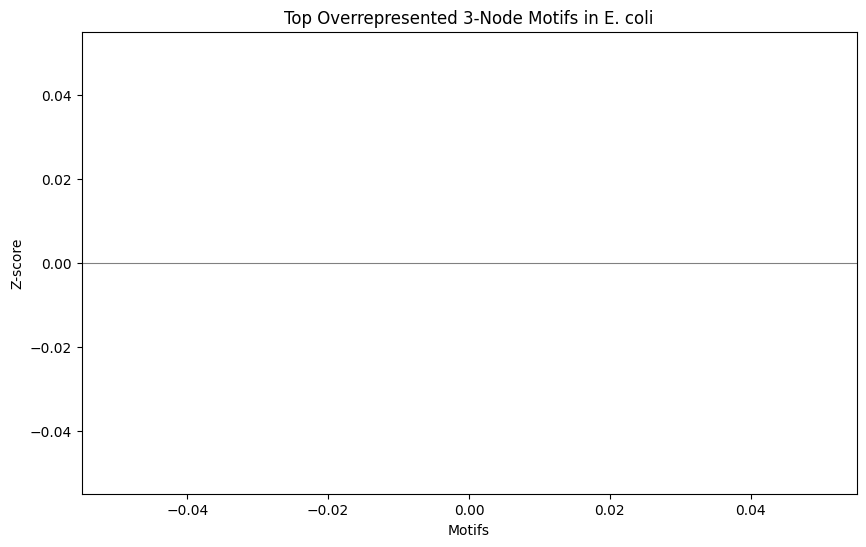

In [7]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
import random
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define file paths
ecoli_file = '../data/E_coli_gene_regulation copy.txt'        # Path to E. coli data file
yeast_file = '../data/S_cerevisiae_gene_regulation copy.txt'  # Path to Yeast data file

# Function to load data and create a directed graph
def load_graph(file_path, is_ecoli=False):
    G = nx.DiGraph()
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split('\t')
            if is_ecoli:
                if len(parts) < 3:
                    continue  # Skip malformed lines
                regulator, target, regulation = parts
                G.add_edge(regulator, target, regulation=regulation)
            else:
                if len(parts) < 2:
                    continue  # Skip malformed lines
                regulator, target = parts
                G.add_edge(regulator, target)
    return G

# Load E. coli and Yeast networks
ecoli_graph = load_graph(ecoli_file, is_ecoli=True)
yeast_graph = load_graph(yeast_file, is_ecoli=False)

print(f"E. coli graph: {ecoli_graph.number_of_nodes()} nodes, {ecoli_graph.number_of_edges()} edges")
print(f"Yeast graph: {yeast_graph.number_of_nodes()} nodes, {yeast_graph.number_of_edges()} edges")

# Function to enumerate all 3-node directed motifs
def enumerate_3node_motifs(G):
    motif_counts = defaultdict(int)
    # Define all possible 3-node directed motifs (13 in total)
    # Each motif is represented by its canonical adjacency matrix
    for triplet in combinations(G.nodes(), 3):
        subgraph = G.subgraph(triplet)
        if subgraph.number_of_edges() == 0:
            continue  # Skip empty subgraphs
        # Create a canonical form by sorting nodes
        # and generating an adjacency matrix
        adj_matrix = nx.adjacency_matrix(subgraph, nodelist=triplet).todense()
        motif_counts[str(adj_matrix)] += 1
    return motif_counts

# Function to generate randomized networks preserving in-degree and out-degree
def generate_random_graph(G, nswap_ratio=5, max_tries_ratio=10):
    RG = G.copy()
    nswap = G.number_of_edges() * nswap_ratio  # Number of swap attempts
    max_tries = G.number_of_edges() * max_tries_ratio  # Maximum number of attempts
    try:
        # Use directed_edge_swap from NetworkX's swap algorithms
        nx.algorithms.swap.directed_edge_swap(RG, nswap=nswap, max_tries=max_tries)
    except nx.NetworkXAlgorithmError as e:
        print(f"Swap error: {e}")
        print(f"Attempting with reduced number of swaps and increased max_tries...")
        # Attempt with reduced nswap and increased max_tries
        nswap_reduced = int(nswap / 2)
        max_tries_increased = max_tries * 2
        try:
            nx.algorithms.swap.directed_edge_swap(RG, nswap=nswap_reduced, max_tries=max_tries_increased)
            print(f"Successfully performed {nswap_reduced} swaps with {max_tries_increased} max tries.")
        except nx.NetworkXAlgorithmError as e2:
            print(f"Second swap attempt failed: {e2}")
            print("Returning the original graph without full randomization.")
    return RG

# Function to count motifs in a graph
def count_motifs(G):
    motif_counts = enumerate_3node_motifs(G)
    return motif_counts

# Count motifs in real E. coli and Yeast networks
print("\nCounting motifs in real networks...")
ecoli_motifs = count_motifs(ecoli_graph)
yeast_motifs = count_motifs(yeast_graph)

# Generate randomized networks and count motifs
num_random = 5  # Increased to 100 for robust statistics
print(f"\nGenerating {num_random} randomized networks and counting motifs...")
def average_random_motifs(G, num_random):
    random_motif_counts = defaultdict(list)
    for i in range(num_random):
        RG = generate_random_graph(G)
        motifs = count_motifs(RG)
        for motif, count in motifs.items():
            random_motif_counts[motif].append(count)
        if (i+1) % 10 == 0 or (i+1) == num_random:
            print(f"  Completed {i+1}/{num_random} randomized networks")
    # Calculate mean and std for each motif
    motif_stats = {}
    for motif, counts in random_motif_counts.items():
        motif_stats[motif] = {
            'mean': np.mean(counts),
            'std': np.std(counts)
        }
    return motif_stats

ecoli_random_stats = average_random_motifs(ecoli_graph, num_random)
yeast_random_stats = average_random_motifs(yeast_graph, num_random)

# Function to compute Z-scores
def compute_z_scores(real_counts, random_stats):
    z_scores = {}
    for motif, count in real_counts.items():
        if motif in random_stats:
            mean = random_stats[motif]['mean']
            std = random_stats[motif]['std']
            if std > 0:
                z = (count - mean) / std
                z_scores[motif] = z
            else:
                z_scores[motif] = np.nan  # Undefined if std is zero
        else:
            z_scores[motif] = np.nan  # No data in random networks
    return z_scores

ecoli_z = compute_z_scores(ecoli_motifs, ecoli_random_stats)
yeast_z = compute_z_scores(yeast_motifs, yeast_random_stats)

# Identify top motifs based on Z-score
def get_top_motifs(z_scores, top_n=5):
    # Remove motifs with NaN Z-scores
    filtered_z = {k: v for k, v in z_scores.items() if not np.isnan(v)}
    sorted_motifs = sorted(filtered_z.items(), key=lambda item: item[1], reverse=True)
    return sorted_motifs[:top_n]

top_ecoli_motifs = get_top_motifs(ecoli_z)
top_yeast_motifs = get_top_motifs(yeast_z)

print("\nTop overrepresented motifs in E. coli:")
for i, (motif, z) in enumerate(top_ecoli_motifs, 1):
    print(f"Motif {i}: Z-score = {z:.2f}\n{motif}\n")

print("\nTop overrepresented motifs in Yeast:")
for i, (motif, z) in enumerate(top_yeast_motifs, 1):
    print(f"Motif {i}: Z-score = {z:.2f}\n{motif}\n")

# Visualization: Bar plots of top motifs with Z-scores
def plot_top_motifs(top_motifs, title):
    motifs = [f"Motif {i+1}" for i in range(len(top_motifs))]
    z_scores = [z for _, z in top_motifs]
    
    plt.figure(figsize=(10,6))
    bars = plt.bar(motifs, z_scores, color='skyblue')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.xlabel('Motifs')
    plt.ylabel('Z-score')
    plt.title(title)
    plt.ylim(min(z_scores) - 1, max(z_scores) + 1)
    
    # Annotate bars with Z-score values
    for bar, z in zip(bars, z_scores):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{z:.2f}', ha='center', va='bottom')
    
    plt.show()

# Plot for E. coli
plot_top_motifs(top_ecoli_motifs, 'Top Overrepresented 3-Node Motifs in E. coli')

# Plot for Yeast
plot_top_motifs(top_yeast_motifs, 'Top Overrepresented 3-Node Motifs in Yeast')

# Optional: Visualize one of the motifs
# For demonstration, visualize the top motif in E. coli
def visualize_motif(adj_matrix_str, title):
    adj_matrix = np.array(eval(adj_matrix_str))
    G = nx.from_numpy_matrix(adj_matrix, create_using=nx.DiGraph)
    pos = nx.circular_layout(G)
    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightgreen', edge_color='grey', node_size=800, font_size=12)
    plt.title(title)
    plt.show()

if top_ecoli_motifs:
    top_motif_matrix, top_z = top_ecoli_motifs[0]
    visualize_motif(top_motif_matrix, f"Top Motif in E. coli (Z={top_z:.2f})")

if top_yeast_motifs:
    top_motif_matrix, top_z = top_yeast_motifs[0]
    visualize_motif(top_motif_matrix, f"Top Motif in Yeast (Z={top_z:.2f})")


E. coli graph: 119 nodes, 110 edges
Yeast graph: 102 nodes, 100 edges

Counting motifs in real networks...

Number of unique motifs in E. coli real network: 9
Number of unique motifs in Yeast real network: 9

Generating 5 randomized networks and counting motifs...
  Completed 5/5 randomized networks
  Completed 5/5 randomized networks

Number of unique motifs in E. coli randomized networks: 13
Number of unique motifs in Yeast randomized networks: 11

Number of Z-scores computed for E. coli: 9
Number of Z-scores computed for Yeast: 9

Top overrepresented motifs in E. coli:
Motif 1: Z-score = 219.78
[[0 0 0]
 [1 0 1]
 [0 0 0]]

Motif 2: Z-score = 42.20
[[0 0 0]
 [0 0 1]
 [0 0 0]]

Motif 3: Z-score = 14.32
[[0 1 0]
 [0 0 0]
 [0 0 0]]

Motif 4: Z-score = -1.14
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Motif 5: Z-score = -11.17
[[0 0 0]
 [0 0 0]
 [0 1 0]]


Top overrepresented motifs in Yeast:
Motif 1: Z-score = 69.00
[[0 0 0]
 [1 0 1]
 [0 0 0]]

Motif 2: Z-score = 41.86
[[0 0 0]
 [0 0 1]
 [0 0

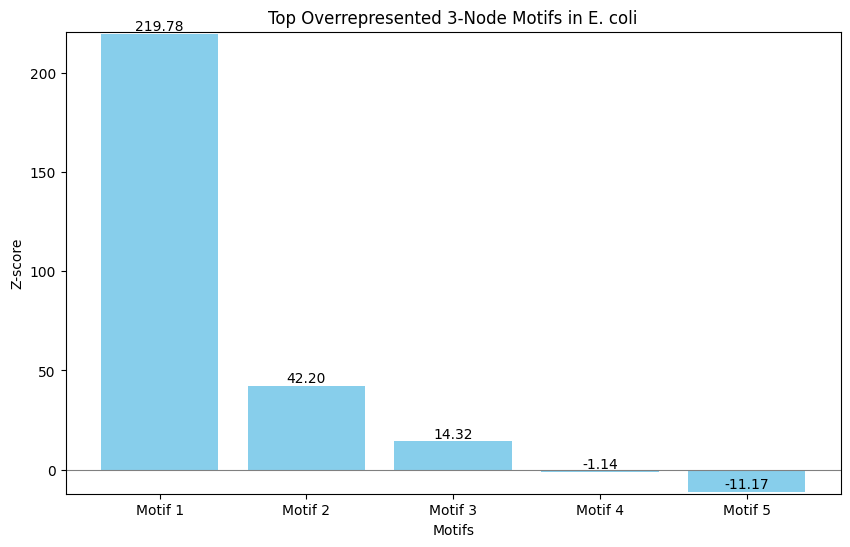

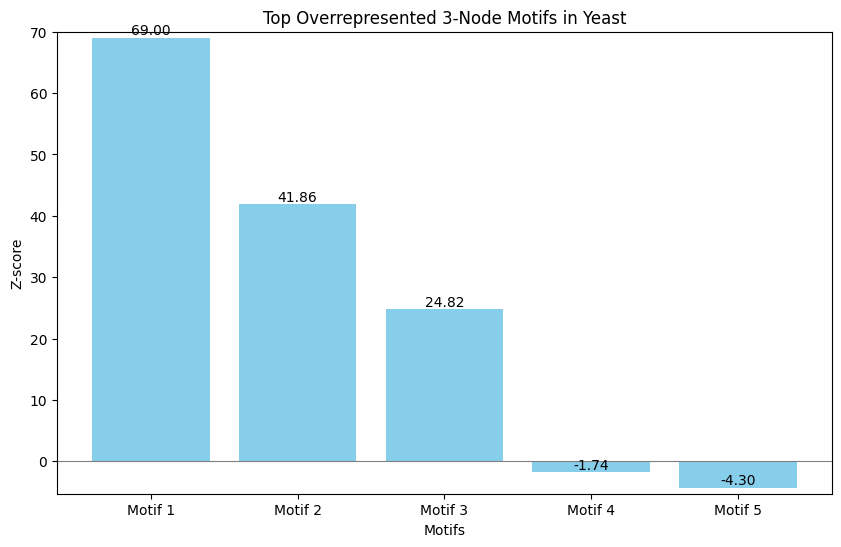

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<string>, line 1)

In [10]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import combinations
from collections import defaultdict
import random
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define file paths
# Replace these paths with the correct paths to your data files
ecoli_file = '../data/E_coli_gene_regulation copy.txt'        # Path to E. coli data file
yeast_file = '../data/S_cerevisiae_gene_regulation copy.txt'  # Path to Yeast data file

# Function to load data and create a directed graph
def load_graph(file_path, is_ecoli=False):
    G = nx.DiGraph()
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split('\t')
            if is_ecoli:
                if len(parts) < 3:
                    continue  # Skip malformed lines
                regulator, target, regulation = parts
                G.add_edge(regulator, target, regulation=regulation)
            else:
                if len(parts) < 2:
                    continue  # Skip malformed lines
                regulator, target = parts
                G.add_edge(regulator, target)
    return G

# Load E. coli and Yeast networks
ecoli_graph = load_graph(ecoli_file, is_ecoli=True)
yeast_graph = load_graph(yeast_file, is_ecoli=False)

print(f"E. coli graph: {ecoli_graph.number_of_nodes()} nodes, {ecoli_graph.number_of_edges()} edges")
print(f"Yeast graph: {yeast_graph.number_of_nodes()} nodes, {yeast_graph.number_of_edges()} edges")

# Function to enumerate all 3-node directed motifs
def enumerate_3node_motifs(G):
    motif_counts = defaultdict(int)
    # Define all possible 3-node directed motifs (including empty subgraphs)
    for triplet in combinations(G.nodes(), 3):
        subgraph = G.subgraph(triplet)
        # No longer skipping triplets with zero edges
        adj_matrix = nx.adjacency_matrix(subgraph, nodelist=triplet).todense()
        motif_counts[str(adj_matrix)] += 1
    return motif_counts

# Function to generate randomized graphs using the configuration model
def generate_random_graph_config_model(G):
    # Extract in-degree and out-degree sequences
    in_deg = [G.in_degree(n) for n in G.nodes()]
    out_deg = [G.out_degree(n) for n in G.nodes()]
    
    # Generate a random graph using the configuration model
    RG = nx.directed_configuration_model(out_deg, in_deg, create_using=nx.DiGraph(), seed=random.randint(0, 10000))
    
    # Remove self-loops and parallel edges
    RG = nx.DiGraph(RG)  # Converts to simple DiGraph, removing parallel edges
    RG.remove_edges_from(nx.selfloop_edges(RG))
    
    # Relabel nodes to match the original graph
    RG = nx.relabel_nodes(RG, dict(zip(RG.nodes(), G.nodes())))
    
    return RG

# Function to count motifs in a graph
def count_motifs(G):
    motif_counts = enumerate_3node_motifs(G)
    return motif_counts

# Count motifs in real E. coli and Yeast networks
print("\nCounting motifs in real networks...")
ecoli_motifs = count_motifs(ecoli_graph)
yeast_motifs = count_motifs(yeast_graph)

# Diagnostic Prints
print(f"\nNumber of unique motifs in E. coli real network: {len(ecoli_motifs)}")
print(f"Number of unique motifs in Yeast real network: {len(yeast_motifs)}")

# Generate randomized networks and count motifs
num_random = 5  # Adjust based on computational resources
print(f"\nGenerating {num_random} randomized networks and counting motifs...")

def average_random_motifs_config_model(G, num_random):
    random_motif_counts = defaultdict(list)
    for i in range(num_random):
        RG = generate_random_graph_config_model(G)
        motifs = count_motifs(RG)
        for motif, count in motifs.items():
            random_motif_counts[motif].append(count)
        if (i+1) % 10 == 0 or (i+1) == num_random:
            print(f"  Completed {i+1}/{num_random} randomized networks")
    # Calculate mean and std for each motif
    motif_stats = {}
    for motif, counts in random_motif_counts.items():
        motif_stats[motif] = {
            'mean': np.mean(counts),
            'std': np.std(counts)
        }
    return motif_stats

ecoli_random_stats = average_random_motifs_config_model(ecoli_graph, num_random)
yeast_random_stats = average_random_motifs_config_model(yeast_graph, num_random)

# Diagnostic Prints for Random Stats
print(f"\nNumber of unique motifs in E. coli randomized networks: {len(ecoli_random_stats)}")
print(f"Number of unique motifs in Yeast randomized networks: {len(yeast_random_stats)}")

# Function to compute Z-scores
def compute_z_scores(real_counts, random_stats):
    z_scores = {}
    for motif, count in real_counts.items():
        if motif in random_stats:
            mean = random_stats[motif]['mean']
            std = random_stats[motif]['std']
            if std > 0:
                z = (count - mean) / std
                z_scores[motif] = z
            else:
                z_scores[motif] = np.nan  # Undefined if std is zero
        else:
            z_scores[motif] = np.nan  # No data in random networks
    return z_scores

ecoli_z = compute_z_scores(ecoli_motifs, ecoli_random_stats)
yeast_z = compute_z_scores(yeast_motifs, yeast_random_stats)

# Diagnostic Prints for Z-scores
print(f"\nNumber of Z-scores computed for E. coli: {len(ecoli_z)}")
print(f"Number of Z-scores computed for Yeast: {len(yeast_z)}")

# Identify top motifs based on Z-score
def get_top_motifs(z_scores, top_n=5):
    # Remove motifs with NaN Z-scores
    filtered_z = {k: v for k, v in z_scores.items() if not np.isnan(v)}
    sorted_motifs = sorted(filtered_z.items(), key=lambda item: item[1], reverse=True)
    return sorted_motifs[:top_n]

top_ecoli_motifs = get_top_motifs(ecoli_z)
top_yeast_motifs = get_top_motifs(yeast_z)

print("\nTop overrepresented motifs in E. coli:")
if top_ecoli_motifs:
    for i, (motif, z) in enumerate(top_ecoli_motifs, 1):
        print(f"Motif {i}: Z-score = {z:.2f}\n{motif}\n")
else:
    print("No overrepresented motifs found.\n")

print("\nTop overrepresented motifs in Yeast:")
if top_yeast_motifs:
    for i, (motif, z) in enumerate(top_yeast_motifs, 1):
        print(f"Motif {i}: Z-score = {z:.2f}\n{motif}\n")
else:
    print("No overrepresented motifs found.\n")

# Visualization: Bar plots of top motifs with Z-scores
def plot_top_motifs(top_motifs, title):
    if not top_motifs:
        print(f"No motifs to plot for {title}.")
        return
    motifs = [f"Motif {i+1}" for i in range(len(top_motifs))]
    z_scores = [z for _, z in top_motifs]
    
    plt.figure(figsize=(10,6))
    bars = plt.bar(motifs, z_scores, color='skyblue')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.xlabel('Motifs')
    plt.ylabel('Z-score')
    plt.title(title)
    plt.ylim(min(z_scores) - 1, max(z_scores) + 1)
    
    # Annotate bars with Z-score values
    for bar, z in zip(bars, z_scores):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{z:.2f}', ha='center', va='bottom')
    
    plt.show()

# Plot for E. coli
plot_top_motifs(top_ecoli_motifs, 'Top Overrepresented 3-Node Motifs in E. coli')

# Plot for Yeast
plot_top_motifs(top_yeast_motifs, 'Top Overrepresented 3-Node Motifs in Yeast')

# Optional: Visualize one of the motifs
# For demonstration, visualize the top motif in E. coli
def visualize_motif(adj_matrix_str, title):
    adj_matrix = np.array(eval(adj_matrix_str))
    G = nx.from_numpy_matrix(adj_matrix, create_using=nx.DiGraph())
    pos = nx.circular_layout(G)
    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightgreen', edge_color='grey', node_size=800, font_size=12)
    plt.title(title)
    plt.show()

if top_ecoli_motifs:
    top_motif_matrix, top_z = top_ecoli_motifs[0]
    visualize_motif(top_motif_matrix, f"Top Motif in E. coli (Z={top_z:.2f})")

if top_yeast_motifs:
    top_motif_matrix, top_z = top_yeast_motifs[0]
    visualize_motif(top_motif_matrix, f"Top Motif in Yeast (Z={top_z:.2f})")
